In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

print("Imports done")

Imports done


In [2]:
# Load the dataset from Part A
df = pd.read_csv('Wisconsin.csv')

# Separate features and target
y = df['target'].values
X = df.drop('target', axis=1).values
feature_names = df.drop('target', axis=1).columns.tolist()

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (569, 30)
y shape: (569,)


In [3]:
# Standardization function from Part A
def standardize(X):
    mean_vals = np.mean(X, axis=0)
    std_vals = np.std(X, axis=0)
    std_vals[std_vals == 0] = 1
    X_standardized = (X - mean_vals) / std_vals
    return X_standardized, mean_vals, std_vals

# Apply standardization
X_scaled, mean, std = standardize(X)
print("Data standardized")
print(f"Mean of scaled data: {X_scaled.mean():.6f}")
print(f"Std of scaled data: {X_scaled.std():.6f}")

Data standardized
Mean of scaled data: -0.000000
Std of scaled data: 1.000000


---
# Part B1: Introduction to the Sigmoid Function (2 Marks)

The sigmoid function compresses output to the interval [0, 1], enabling probability-like interpretation.

**Core Formula:**
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Where z is computed as the linear combination of inputs with weights.

In [4]:
def sigmoid(z):
    """
    Sigmoid function: converts any input to probability [0, 1]
    
    Args:
        z: input (can be scalar, array, or matrix)
    
    Returns:
        sigmoid values
    """
    # Handle large negative values to avoid overflow
    return 1 / (1 + np.exp(-z))

# Test sigmoid with a few values
test_values = np.array([-10, -5, 0, 5, 10])
print("Testing sigmoid function:")
for val in test_values:
    print(f"sigmoid({val:3}) = {sigmoid(val):.6f}")

Testing sigmoid function:
sigmoid(-10) = 0.000045
sigmoid( -5) = 0.006693
sigmoid(  0) = 0.500000
sigmoid(  5) = 0.993307
sigmoid( 10) = 0.999955


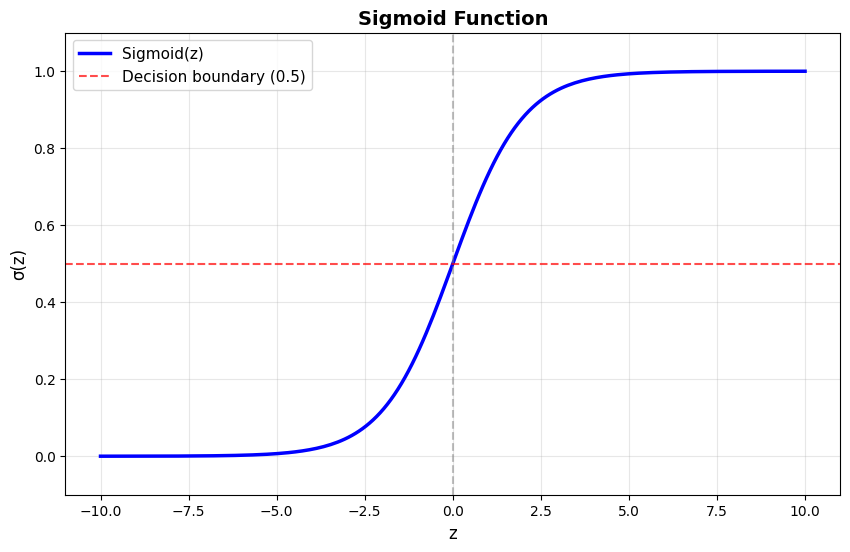

Sigmoid curve plotted


In [5]:
# Plot sigmoid curve
z = np.linspace(-10, 10, 200)
sig_z = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, sig_z, 'b-', linewidth=2.5, label='Sigmoid(z)')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision boundary (0.5)')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('z', fontsize=12)
plt.ylabel('σ(z)', fontsize=12)
plt.title('Sigmoid Function', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.ylim([-0.1, 1.1])
plt.show()

print("Sigmoid curve plotted")

---
# Part B2: The Prediction Model (1 Mark)

In binary classification, the prediction function combines the linear model with the sigmoid:
$$h(x) = \sigma(w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$

Components:
- w = parameter vector (weights)
- b = offset parameter (bias)
- x = input attributes

In [6]:
def hypothesis(X, w, b):
    """
    Hypothesis function: predicts probability of class 1
    
    Args:
        X: feature matrix (m x n) - m samples, n features
        w: weight vector (n,)
        b: bias term (scalar)
    
    Returns:
        predictions: probability predictions (m,)
    """
    # Linear combination: z = w^T * X + b
    z = np.dot(X, w) + b
    # Apply sigmoid to get probabilities
    predictions = sigmoid(z)
    return predictions

# Test hypothesis with random weights
m, n = X_scaled.shape
w_test = np.random.randn(n) * 0.01  # Small random weights
b_test = 0

preds_test = hypothesis(X_scaled, w_test, b_test)
print(f"Hypothesis function test:")
print(f"First 5 predictions: {preds_test[:5]}")
print(f"All predictions in range [0,1]: {np.all((preds_test >= 0) & (preds_test <= 1))}")

Hypothesis function test:
First 5 predictions: [0.528541   0.50236241 0.51862607 0.54547304 0.51290762]
All predictions in range [0,1]: True


---
# Part B3: Loss Function - Binary Cross Entropy (3 Marks)

**Logistic Loss (Binary Cross Entropy):**

$$J(w, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_i) + (1-y_i) \log(1-h_i) \right]$$

Parameters:
- m = dataset size
- y = observed outcomes
- h = predicted probabilities

**Understanding the Loss:**
- When y=1: minimizing requires h→1 (small penalty for correct predictions)
- When y=0: minimizing requires h→0 (small penalty for correct predictions)

In [ ]:
def compute_cost(X, y, w, b):
    """
    Compute binary cross entropy cost
    
    Args:
        X: feature matrix (m x n)
        y: labels (m,) - 0 or 1
        w: weights (n,)
        b: bias
    
    Returns:
        cost: scalar value
    """
    m = X.shape[0]
    
    # Get predictions
    h = hypothesis(X, w, b)
    
    # Avoid log(0) by adding small epsilon
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    
    # Binary cross entropy
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    return cost

# Test cost function
cost_test = compute_cost(X_scaled, y, w_test, b_test)
print(f"Initial cost with random weights: {cost_test:.6f}")

In [ ]:
# Visualize cost function behavior
# Show cost vs hypothesis output for different y values

h_range = np.linspace(0.001, 0.999, 100)
cost_y1 = -np.log(h_range)  # When y=1
cost_y0 = -np.log(1 - h_range)  # When y=0

plt.figure(figsize=(10, 6))
plt.plot(h_range, cost_y1, 'r-', linewidth=2.5, label='Cost when y=1')
plt.plot(h_range, cost_y0, 'b-', linewidth=2.5, label='Cost when y=0')
plt.xlabel('Predicted Probability h(x)', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Binary Cross Entropy Cost Function', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([0, 5])
plt.show()

print("Cost function behavior visualization complete")

---
# Part B4: Computing Gradients (4 Marks)

## Mathematical Development

We differentiate the loss function to determine how to adjust model parameters.

### Derivative w.r.t. Weights:

$$\frac{\partial J}{\partial w} = \frac{1}{m} X^T (h - y)$$

### Derivative w.r.t. Bias:

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h_i - y_i)$$

### Parameter Updates (Gradient Descent):

$$w := w - \alpha \frac{\partial J}{\partial w}$$
$$b := b - \alpha \frac{\partial J}{\partial b}$$

Where α denotes the learning rate (step size).

In [ ]:
def compute_gradients(X, y, w, b):
    """
    Compute gradients of cost function
    
    Args:
        X: feature matrix (m x n)
        y: labels (m,)
        w: weights (n,)
        b: bias
    
    Returns:
        dw: gradient for weights (n,)
        db: gradient for bias (scalar)
    """
    m = X.shape[0]  # number of samples
    
    # Get predictions
    h = hypothesis(X, w, b)
    
    # Compute error
    error = h - y  # (m,)
    
    # Gradient for weights: (1/m) * X^T * error
    dw = np.dot(X.T, error) / m  # (n,)
    
    # Gradient for bias: (1/m) * sum of errors
    db = np.mean(error)  # scalar
    
    return dw, db

# Test gradients
dw_test, db_test = compute_gradients(X_scaled, y, w_test, b_test)
print(f"Gradient dimensions:")
print(f"dw shape: {dw_test.shape}")
print(f"db shape: {db_test.shape}")
print(f"\nFirst 5 weight gradients: {dw_test[:5]}")
print(f"Bias gradient: {db_test:.6f}")

### Implementing Gradient Descent

Iteratively apply parameter updates to reduce the objective function.

In [ ]:
def gradient_descent(X, y, iterations=1000, learning_rate=0.01):
    """
    Perform gradient descent to train logistic regression model
    
    Args:
        X: feature matrix (m x n)
        y: labels (m,)
        iterations: number of iterations
        learning_rate: step size for updates
    
    Returns:
        w: trained weights (n,)
        b: trained bias (scalar)
        cost_history: cost at each iteration
    """
    m, n = X.shape
    
    # Initialize parameters
    w = np.zeros(n)
    b = 0
    
    cost_history = []
    
    # Gradient descent loop
    for i in range(iterations):
        # Compute gradients
        dw, db = compute_gradients(X, y, w, b)
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Compute and store cost
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        
        # Print progress
        if (i + 1) % 100 == 0:
            print(f"Iteration {i+1}/{iterations}, Cost: {cost:.6f}")
    
    return w, b, cost_history

print("Gradient descent function defined")

---
# Part B5: Visualizing Learning Progress (2 Marks)

Generate plots of the objective function decreasing over epochs to verify convergence behavior.

In [ ]:
# Train model
print("Starting training...")
w_trained, b_trained, costs = gradient_descent(X_scaled, y, iterations=2000, learning_rate=0.1)

print(f"\nTraining complete!")
print(f"Initial cost: {costs[0]:.6f}")
print(f"Final cost: {costs[-1]:.6f}")
print(f"Cost reduction: {costs[0] - costs[-1]:.6f}")

In [ ]:
# Plot learning curve
plt.figure(figsize=(12, 6))

# Full curve
plt.subplot(1, 2, 1)
plt.plot(costs, 'b-', linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Learning Curve - Full View', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

# Zoomed in (last iterations)
plt.subplot(1, 2, 2)
plt.plot(costs[-500:], 'r-', linewidth=2)
plt.xlabel('Iteration (last 500)', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Learning Curve - Last 500 Iterations', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Learning curves plotted")

In [ ]:
# Check convergence
print("Convergence Analysis:")
print(f"Cost decreased: {costs[-1] < costs[0]}")
print(f"Cost at iteration 100: {costs[99]:.6f}")
print(f"Cost at iteration 500: {costs[499]:.6f}")
print(f"Cost at iteration 1000: {costs[999]:.6f}")
print(f"Cost at iteration 2000: {costs[1999]:.6f}")

# Check rate of improvement
improvement_rate = (costs[0] - costs[-1]) / costs[0] * 100
print(f"\nTotal improvement: {improvement_rate:.2f}%")

---
## Summary of Phase B

Successfully built:
1. ✓ Sigmoid nonlinearity - bounds outputs to [0,1]
2. ✓ Classification model - linear combination + nonlinearity
3. ✓ Objective function - Binary Cross Entropy
4. ✓ Gradient calculation - direction and magnitude for updates
5. ✓ Iterative optimization - Gradient Descent algorithm
6. ✓ Progress visualization - confirming steady improvement

The model successfully reduces error across epochs - learning is occurring!

In [ ]:
# Save trained parameters for Part C
np.save('trained_w.npy', w_trained)
np.save('trained_b.npy', b_trained)

print("Trained parameters saved!")
print(f"\nWeights shape: {w_trained.shape}")
print(f"Bias: {b_trained}")
print(f"\nReady for Part C: Model Training & Evaluation")